# Import Libraries

In [2]:
# Import the necessary libraries to load andvisualize the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import ShuffleSplit


In [3]:
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [5]:
# Get the shape of the data

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


# Data Exploration
In this section, we will make a cursory investigation about the Boston housing data.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we have separated the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.



## Calculating Statistics
We’ll start with calculating some descriptive statistics about the Boston housing prices.

In [6]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Feature Observation
To dive a bit deeper int our data, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered “lower class” (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
Without building a model, let’s try to figure out if an increase in the value of a feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'.

‘RM’: An increase in the value of this feature will lead to an increase in the value of ‘MEDV’. This is because for you’d expect a home with a higher number of rooms to be more expensive that a home with lower number of rooms.
‘LSTAT’: An increase in the value of this feature will lead to a decrease in the value of ‘MEDV’. A lower class homeowner might not be able to afford expensive houses, so you’d expect them to leave in a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower ‘MEDV’ value.
‘PTRATIO’: An increase in the value of this feature will lead to an decrease in the value of ‘MEDV’. A low student to teacher ration is typically associated with better education level of a school, as a teacher is able to focus on individual students better (than if there were more students). So, due to the presence of better quality schools, people might be willing to pay more to live in those areas, to provide their children with better education, and the prices might be higher

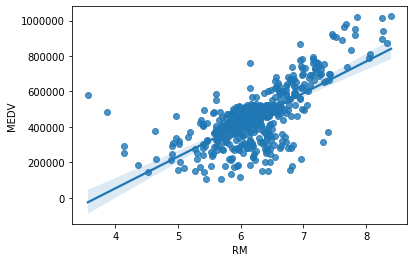

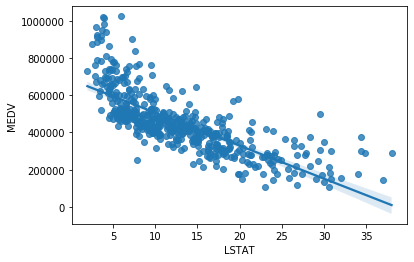

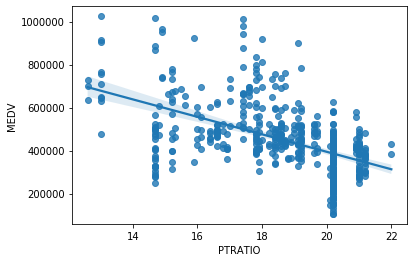

In [7]:
# We can build scatterplots to see if our intuition is correct.

for var in features.columns:
    sns.regplot(data[var], prices)
    plt.show()

## Developing a Model
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model’s performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions

In [8]:
# Let’s define a function that returns the r2 score for given true and predicted data.

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    # Calculate the performance score b/w y_true and y_predict
    score = r2_score(y_true, y_predict)
    
    return score


In [10]:
# Let’s use the performance_metric function and calculate this model’s coefficient of determination

# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


# Shuffle and Split Data
Now we’ll take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)

## Fitting a Model
Now we’ll bring everything together and train a model using the decision tree algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree.

In [43]:
# import the Decision  Tree Libraries


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    # Create cross-validation set from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    # Create an object of Decision Tree Regressor
    regressor = DecisionTreeRegressor()
    
    # Create a Dictionary for the parameter for max_depth ranges from 1 to 10
    params = {'max_depth' : range(1, 11)}
    
    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    # Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Optimal Model 

In [44]:
# fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the Value for max_depth

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


The optimal model has a max depth of 4, which is close enough to the previous guess of 3 earlier. Going back to the complexity graph, the model might perform better on the test set with a max depth of 4, but since the difference is minimal (which can also be due to noise), it might make sense to chose the simpler model.

## Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the information from three of your clients

In [ ]:
# Let's produce a matrix for client data

client_data = [[5, 17, 5], # Client 1
              [4, 32, 22], # Client 2
              [8, 3, 12]] # Client 3

# Show predictions of the above data
for i, price in enumerate(reg.oredict(client_data)):
    